In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def preprocess_data_for_boxplot(csv_path):
    # Load the CSV file
    data = pd.read_csv(csv_path)

    # Create a new DataFrame to store processed data
    processed_data = pd.DataFrame()

    # Iterate through each repeat (assuming each row is a repeat and columns are accuracy results)
    for index, row in data.iterrows():
        # Drop NaN values as they do not contribute to the accuracy results for the specific repeat
        clean_row = row.dropna().reset_index(drop=True)
        
        # Add the cleaned data to the new DataFrame
        processed_data = pd.concat([processed_data, clean_row.to_frame().T], ignore_index=True)

    # The DataFrame processed_data now contains each repeat in rows with corresponding accuracies in columns without NaNs
    return processed_data

<class 'dict'>


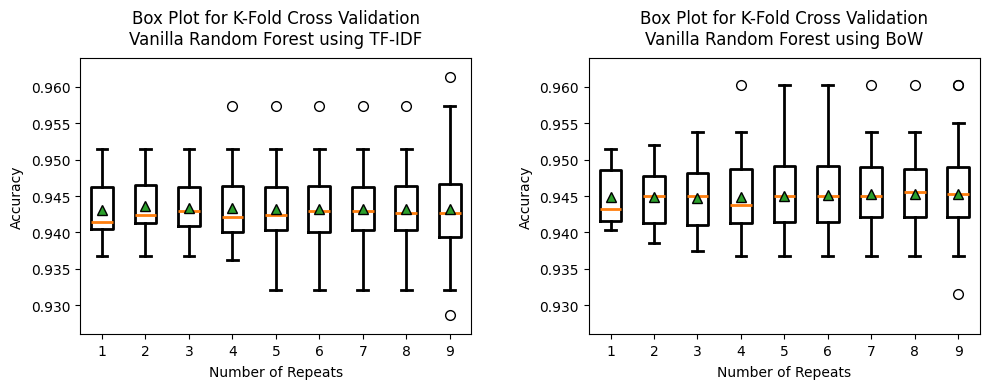

In [17]:
def plot_box_plots(model, data_path, dataset, ylim_range):
    # print(f'Model: {model}, data_path Type: {type(data_path)}, Dataset: {dataset}')  # Debugging output
    # Create a figure with a subplot for each feature representation (TF-IDF, BoW)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    
    # Colors and styles
    boxprops = dict(linewidth=2)
    capprops = dict(linewidth=2)
    flierprops = dict(markersize=7)
    medianprops = dict(linewidth=2)
    whiskerprops = dict(linewidth=2)
    meanprops = dict(markeredgecolor='black', markersize=7)

    # Iterate over each feature representation and corresponding CSV path
    for ax, (feature_representation, data_path_template) in zip(axes, data_path.items()):
        csv_file_path = data_path_template.format(dataset=dataset)
        
        # print(f'Feature Representation: {feature_representation}, CSV File Path: {csv_file_path}')  # Debugging output
        processed_data = preprocess_data_for_boxplot(csv_file_path)

        # Plot the boxplots
        ax.boxplot([processed_data.iloc[i].dropna() for i in range(processed_data.shape[0])], showmeans=True, boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, meanprops=meanprops, whiskerprops=whiskerprops, capprops=capprops)
        ax.set_title(f'Box Plot for K-Fold Cross Validation\n{model} using {feature_representation}', fontsize=12, pad=10)
        ax.set_ylabel('Accuracy', labelpad=5)
        ax.set_xlabel('Number of Repeats', labelpad=5)
        # set x tick label to increment by 0.05
        # ax.set_yticks(np.arange(0.924, 0.966, 0.005))
        ax.set_ylim(ylim_range)

    # Adjust the width space between subplots
    

    # Save the figure with a model-specific filename
    fig_filename = f'Figs/RF_{model.replace(" ", "_")}_DS{dataset}_Comparison_Box_Plot.pdf'

    plt.tight_layout()
    plt.subplots_adjust(wspace=.3)
    plt.savefig(fig_filename, dpi=500)
    plt.show()
    plt.close(fig)

# Configuration of datasets and models
dataset = 1
models_rf = {
    'Vanilla Random Forest': {
        'TF-IDF': f'2_Random_Forest/k-fold_results/{dataset}/rf_vanilla_tfidf.csv',
        'BoW': f'2_Random_Forest/k-fold_results/{dataset}/rf_vanilla_bow.csv',
    },
    'Square Root Features Random Forest': {
        'TF-IDF': f'2_Random_Forest/k-fold_results/{dataset}/rf_random_tfidf.csv',
        'BoW': f'2_Random_Forest/k-fold_results/{dataset}/rf_random_bow.csv',
    },
    'Voting Random Forests Ensemble': {
        'TF-IDF': f'2_Random_Forest/k-fold_results/{dataset}/rf_voting_tfidf.csv',
        'BoW': f'2_Random_Forest/k-fold_results/{dataset}/rf_voting_bow.csv',
    },
}

models_rf_van = {
    'Vanilla Random Forest': {
        'TF-IDF': f'2_Random_Forest/k-fold_results/{dataset}/rf_vanilla_tfidf.csv',
        'BoW': f'2_Random_Forest/k-fold_results/{dataset}/rf_vanilla_bow.csv',
    }
}

models_dt = {
    'Decision Tree': {
        'TF-IDF': f'3_Decision_Trees/k-fold_results/{dataset}/dt_tfidf.csv',
        'BoW': f'3_Decision_Trees/k-fold_results/{dataset}/dt_bow.csv',
    },
}

models_lr = {
    'Logistic Regression': {
        'TF-IDF': f'1_Logistic_Regression/k-fold_results/{dataset}/lr_tfidf.csv',
        'BoW': f'1_Logistic_Regression/k-fold_results/{dataset}/lr_bow.csv',
    },
}

model_ranges = {
    'Random Forest': [0.926, 0.964],
    'Decision Tree': [0.918, 0.957],
    'Logistic Regression': [0.903, 0.947],
}

models = models_rf_van
model_name = list(model_ranges.keys())[0]

# Iterate over each dataset and model to plot the box plots
for model, data_path in models.items():
    print(type(data_path))
    plot_box_plots(model, data_path, dataset, model_ranges[model_name])
